In [33]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
sns.set(color_codes = True)

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
# To get Options Data
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Black Scholes Model**
It determines the cost of a Call Option (can use Call-Put Parity Theorem to calculate the cost of an equivalent European Put Option) assuming that:

1. There is no arbitrage (the model is arbitrage free)
2. Nominal rate of interest in 'r' and is compounded continuously
3. The price of the security follows a **Geometric Brownian Motion**
4. There is no divdend payout.
5. Volatility of the security is constant.

Formula : $C = e^{-rt}E[(S(t)-K)^{+}]$ where, 

$C$ = Price of the Option <br>
$r$ = Nominal Interest Rate (Compouned Continuously) <br>
$K$ = Strike Price of the Option <br>
$S(t)$ = Price of the Security at time $t$ (time at which the option expires)<br>
$f(x) = x^{+} = max(0,x)$ <br>

On Further Simplification, <br>
$C = e^{-rt}E[(S(0)W-K)^{+}]$ where, $W \sim N((r-\frac{\sigma^2}{2})t, \sigma^2t))$ <br><br>

$\mathbf{C = S(0)\Phi(\omega) - Ke^{-rt}\Phi(\omega - \sigma \sqrt{t}})$ where, <br>
$\mathbf{\omega = (rt+\sigma^2t/2 - log(K/S(0)))/(\sigma\sqrt{t})}$


In [7]:
from scipy.stats import norm 

# Implement Black Scholes Model with the above formula
def black_scholes_model(K, s, r, sigma, t, mode = "call"):
    w = (r*t + sigma**2*t/2 - np.log(K/s))/(sigma*np.sqrt(t))
    C = s*norm.cdf(w) - K*np.exp(-r*t)*norm.cdf(w-sigma*np.sqrt(t))
    
    if mode=="put":
        P = C-s+K*np.exp(-r*t)
        return P 
    else:
        return C

In [8]:
stock_name = "MSFT"
df = pd.read_csv(f"{stock_name}.csv")
df = df.sort_values(by="Date")
df.dropna(inplace = True)
print(df.head())
m,n = df.shape
print(f"No. of Rows = {m}, No. of Columns = {n}")

         Date        Open        High         Low       Close   Adj Close  \
0  2021-08-19  288.690002  297.470001  288.640015  296.769989  294.305145   
1  2021-08-20  299.720001  305.839996  298.059998  304.359985  301.832123   
2  2021-08-23  303.250000  305.399994  301.850006  304.649994  302.119751   
3  2021-08-24  305.019989  305.649994  302.000000  302.619995  300.106598   
4  2021-08-25  304.299988  304.589996  300.420013  302.010010  299.501648   

     Volume  
0  29850500  
1  40817600  
2  22830200  
3  18175800  
4  20006100  
No. of Rows = 252, No. of Columns = 7


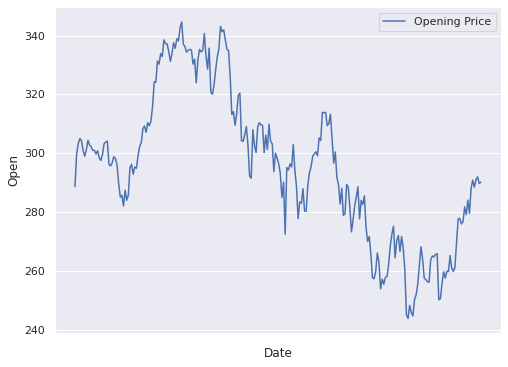

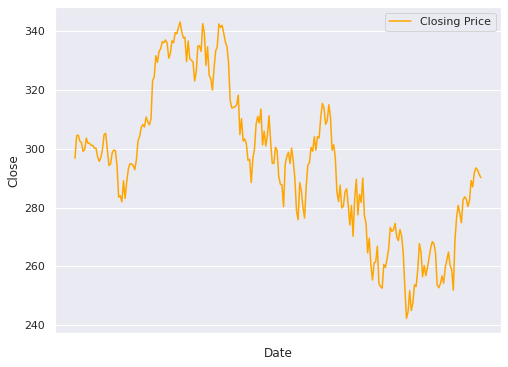

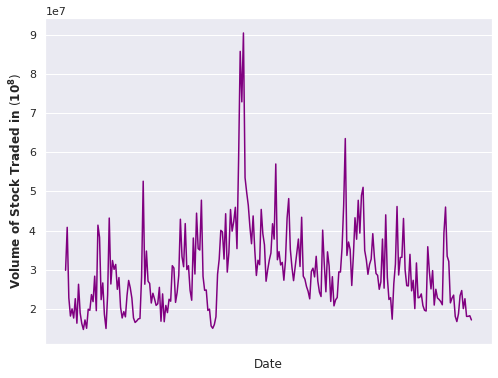

In [9]:
# Plotting the Opening Price Data
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(df['Date'], df['Open'], label = 'Opening Price')
plt.legend()
ax.set_xticklabels([])
ax.grid(axis="x")
plt.show()

# Plotting the Closing Price Data
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(df['Date'], df['Close'], label = 'Closing Price', color = "orange")
plt.legend()
ax.set_xticklabels([])
ax.grid(axis="x")
plt.show()

# Plotting the Volume of the Stock Traded
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(df['Date'], df['Volume'], color = "purple")
plt.ylabel("Volume of Stock Traded in $(\mathbf{10^8})$", fontweight = "bold")
ax.set_xticklabels([])
ax.grid(axis="x")
plt.show()

In [10]:
# Calculating sigma for the Black Scholes Model
# Sigma denotes the volatility of the stock
# Normal Volatility = Standard deviation of a sequence of RVs each of which is the return of the fund over a specified time period
# We are going to use tha annuaized return volatitlity - standard deviation of the security's yearly logarithmic returns
# https://en.wikipedia.org/wiki/Volatility_(finance)#Mathematical_definition

returns = np.log(np.array(df.loc[1:,"Close"])/np.array(df.loc[:m-2,"Close"]))
sigma = returns.std()*np.sqrt(252) # Since 252 trading days in a year

In [11]:
# Getting Options Stats from Tesla using the Yahoo Finance API

tesla = yf.Ticker(f"{stock_name}")
print(tesla.options)
expiration_date = tesla.options[4] # Taken expiration date to be 2021-08-20
print(expiration_date)

# List of options
options = tesla.option_chain(expiration_date)
call_options = options.calls

# Converting Call Options to DataFrame
call_options = pd.DataFrame(call_options)
call_options

('2022-08-19', '2022-08-26', '2022-09-02', '2022-09-09', '2022-09-16', '2022-09-23', '2022-09-30', '2022-10-21', '2022-11-18', '2022-12-16', '2023-01-20', '2023-02-17', '2023-03-17', '2023-04-21', '2023-06-16', '2023-09-15', '2024-01-19', '2024-06-21')
2022-09-16


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT220916C00080000,2022-08-17 14:34:57+00:00,80.0,211.47,204.55,208.30,0.0,0.0,4,24,1.945313,True,REGULAR,USD
1,MSFT220916C00085000,2022-05-17 19:41:58+00:00,85.0,181.25,158.70,162.15,0.0,0.0,4,2,0.000010,True,REGULAR,USD
2,MSFT220916C00090000,2022-08-17 14:45:36+00:00,90.0,201.55,194.55,198.45,0.0,0.0,2,9,1.830079,True,REGULAR,USD
3,MSFT220916C00095000,2022-08-16 19:38:32+00:00,95.0,198.00,189.60,193.45,0.0,0.0,6,3,1.765626,True,REGULAR,USD
4,MSFT220916C00100000,2022-08-18 19:20:21+00:00,100.0,192.00,184.60,188.45,0.0,0.0,1,126,1.687502,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,MSFT220916C00470000,2022-05-31 19:08:04+00:00,470.0,0.03,0.00,0.17,0.0,0.0,220,429,0.664066,False,REGULAR,USD
76,MSFT220916C00480000,2022-08-18 16:43:50+00:00,480.0,0.02,0.00,0.01,0.0,0.0,1,1201,0.546880,False,REGULAR,USD
77,MSFT220916C00490000,2022-08-01 15:26:05+00:00,490.0,0.01,0.00,0.01,0.0,0.0,5,412,0.562504,False,REGULAR,USD
78,MSFT220916C00500000,2022-08-11 14:33:00+00:00,500.0,0.02,0.00,0.00,0.0,0.0,2,1665,0.500005,False,REGULAR,USD


In [12]:
# Getting Today's Date and Time remaining for option to expire
from datetime import date
today = date.today()
exp = expiration_date
exp = date(int(exp[:4]), int(exp[5:7]), int(exp[8:]))
print(today)
print(exp)
print((exp-today).days)

2022-08-19
2022-09-16
28


In [13]:
# Predicting the Option Price for all the examples we have 
option_price_pred = []

for strike_price in call_options["strike"]:
    option_price = black_scholes_model(K = strike_price,
                                       s = tesla.info["currentPrice"],
                                       r = 0.0069,
                                       sigma = sigma,
                                       t = (exp-today).days/252)
    option_price_pred.append(option_price)

df_price = pd.concat([pd.Series(option_price_pred), pd.Series(call_options['lastPrice'])], axis = 1)
print(df_price)

               0  lastPrice
0   2.062113e+02     211.47
1   2.012151e+02     181.25
2   1.962190e+02     201.55
3   1.912228e+02     198.00
4   1.862266e+02     192.00
..           ...        ...
75  3.137103e-06       0.03
76  1.031521e-06       0.02
77  3.335055e-07       0.01
78  1.061659e-07       0.02
79  1.031925e-08       0.02

[80 rows x 2 columns]


#**Call Options Predictions**

In [14]:
df_call = pd.concat([call_options, pd.Series(option_price_pred, name = "Predicted Call Price")], axis = 1)
df_call["Error Estimate"] = (df_call['Predicted Call Price'] - df_call["lastPrice"])/df_call["lastPrice"]*100
df_call

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Predicted Call Price,Error Estimate
0,MSFT220916C00080000,2022-08-17 14:34:57+00:00,80.0,211.47,204.55,208.30,0.0,0.0,4,24,1.945313,True,REGULAR,USD,2.062113e+02,-2.486731
1,MSFT220916C00085000,2022-05-17 19:41:58+00:00,85.0,181.25,158.70,162.15,0.0,0.0,4,2,0.000010,True,REGULAR,USD,2.012151e+02,11.015251
2,MSFT220916C00090000,2022-08-17 14:45:36+00:00,90.0,201.55,194.55,198.45,0.0,0.0,2,9,1.830079,True,REGULAR,USD,1.962190e+02,-2.645014
3,MSFT220916C00095000,2022-08-16 19:38:32+00:00,95.0,198.00,189.60,193.45,0.0,0.0,6,3,1.765626,True,REGULAR,USD,1.912228e+02,-3.422826
4,MSFT220916C00100000,2022-08-18 19:20:21+00:00,100.0,192.00,184.60,188.45,0.0,0.0,1,126,1.687502,True,REGULAR,USD,1.862266e+02,-3.006960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,MSFT220916C00470000,2022-05-31 19:08:04+00:00,470.0,0.03,0.00,0.17,0.0,0.0,220,429,0.664066,False,REGULAR,USD,3.137103e-06,-99.989543
76,MSFT220916C00480000,2022-08-18 16:43:50+00:00,480.0,0.02,0.00,0.01,0.0,0.0,1,1201,0.546880,False,REGULAR,USD,1.031521e-06,-99.994842
77,MSFT220916C00490000,2022-08-01 15:26:05+00:00,490.0,0.01,0.00,0.01,0.0,0.0,5,412,0.562504,False,REGULAR,USD,3.335055e-07,-99.996665
78,MSFT220916C00500000,2022-08-11 14:33:00+00:00,500.0,0.02,0.00,0.00,0.0,0.0,2,1665,0.500005,False,REGULAR,USD,1.061659e-07,-99.999469


In [15]:
error = ((df_call["Error Estimate"]*df_call["lastPrice"]/100)**2/df_call.shape[0]).sum()
print(f"RMSE = {np.sqrt(error)}")

RMSE = 3.719235497865454


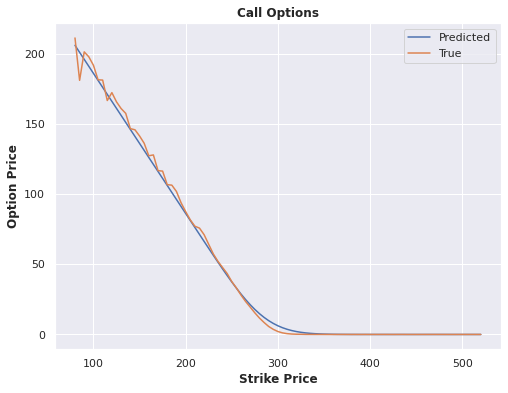

In [16]:
plt.subplots(figsize=(8,6))
sns.lineplot(df_call["strike"], df_call["Predicted Call Price"], label="Predicted")
sns.lineplot(df_call["strike"], df_call["lastPrice"], label = "True")
plt.xlabel("Strike Price", fontweight = "bold")
plt.ylabel("Option Price", fontweight = "bold")
plt.title("Call Options", fontweight = "bold")
plt.show()

#**Put Options Predictions**

In [17]:
put_options = options.puts
put_options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT220916P00080000,2022-07-26 16:56:56+00:00,80.0,0.03,0.00,0.01,0.0,0.0,1,6374,1.312503,False,REGULAR,USD
1,MSFT220916P00085000,2022-07-25 16:59:23+00:00,85.0,0.02,0.00,0.01,0.0,0.0,1,470,1.281254,False,REGULAR,USD
2,MSFT220916P00090000,2022-07-12 19:25:58+00:00,90.0,0.02,0.00,0.06,0.0,0.0,1,1529,1.398441,False,REGULAR,USD
3,MSFT220916P00095000,2022-08-12 16:05:53+00:00,95.0,0.01,0.00,0.01,0.0,0.0,6,372,1.156254,False,REGULAR,USD
4,MSFT220916P00100000,2022-08-12 16:04:28+00:00,100.0,0.01,0.00,0.01,0.0,0.0,4,1426,1.093755,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,MSFT220916P00450000,2022-08-17 18:18:07+00:00,450.0,158.85,161.65,165.65,0.0,0.0,10,6,0.951905,True,REGULAR,USD
74,MSFT220916P00460000,2021-11-30 16:59:48+00:00,460.0,132.60,121.15,125.20,0.0,0.0,1,2,0.000010,True,REGULAR,USD
75,MSFT220916P00490000,2022-07-13 19:54:41+00:00,490.0,237.70,197.40,200.75,0.0,0.0,1,1,0.000010,True,REGULAR,USD
76,MSFT220916P00500000,2022-01-21 15:16:11+00:00,500.0,201.75,210.00,214.20,0.0,0.0,1,0,0.867189,True,REGULAR,USD


In [18]:
# Predicting the Option Price for all the examples we have 
option_price_pred = []

for strike_price in put_options["strike"]:
    option_price = black_scholes_model(K = strike_price,
                                       s = tesla.info["currentPrice"],
                                       r = 0.0069,
                                       sigma = sigma,
                                       t = (exp-today).days/252,
                                       mode="put")
    option_price_pred.append(option_price)

df_put = pd.concat([put_options, pd.Series(option_price_pred, name = "Predicted Put Price")], axis = 1)
df_put["Error Estimate"] = (df_put['Predicted Put Price'] - df_put["lastPrice"])/df_put["lastPrice"]*100
df_put

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Predicted Put Price,Error Estimate
0,MSFT220916P00080000,2022-07-26 16:56:56+00:00,80.0,0.03,0.00,0.01,0.0,0.0,1,6374,1.312503,False,REGULAR,USD,0.000000e+00,-100.000000
1,MSFT220916P00085000,2022-07-25 16:59:23+00:00,85.0,0.02,0.00,0.01,0.0,0.0,1,470,1.281254,False,REGULAR,USD,-1.421085e-14,-100.000000
2,MSFT220916P00090000,2022-07-12 19:25:58+00:00,90.0,0.02,0.00,0.06,0.0,0.0,1,1529,1.398441,False,REGULAR,USD,0.000000e+00,-100.000000
3,MSFT220916P00095000,2022-08-12 16:05:53+00:00,95.0,0.01,0.00,0.01,0.0,0.0,6,372,1.156254,False,REGULAR,USD,1.421085e-14,-100.000000
4,MSFT220916P00100000,2022-08-12 16:04:28+00:00,100.0,0.01,0.00,0.01,0.0,0.0,4,1426,1.093755,False,REGULAR,USD,0.000000e+00,-100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,MSFT220916P00450000,2022-08-17 18:18:07+00:00,450.0,158.85,161.65,165.65,0.0,0.0,10,6,0.951905,True,REGULAR,USD,1.635052e+02,2.930538
74,MSFT220916P00460000,2021-11-30 16:59:48+00:00,460.0,132.60,121.15,125.20,0.0,0.0,1,2,0.000010,True,REGULAR,USD,1.734975e+02,30.842743
75,MSFT220916P00490000,2022-07-13 19:54:41+00:00,490.0,237.70,197.40,200.75,0.0,0.0,1,1,0.000010,True,REGULAR,USD,2.034745e+02,-14.398621
76,MSFT220916P00500000,2022-01-21 15:16:11+00:00,500.0,201.75,210.00,214.20,0.0,0.0,1,0,0.867189,True,REGULAR,USD,2.134668e+02,5.807590


In [19]:
error = ((df_put["Error Estimate"]*df_put["lastPrice"]/100)**2/df_put.shape[0]).sum()
print(f"RMSE = {np.sqrt(error)}")

RMSE = 11.776369875051696


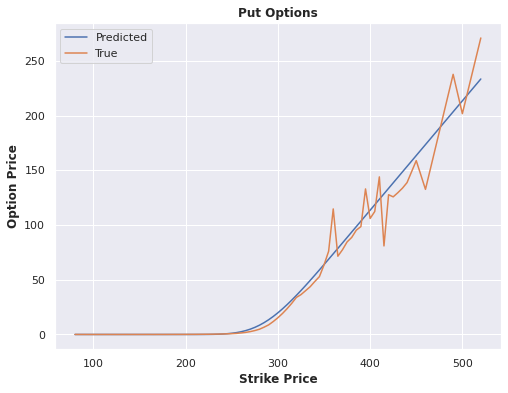

In [20]:
plt.subplots(figsize=(8,6))
sns.lineplot(df_put["strike"], df_put["Predicted Put Price"], label="Predicted")
sns.lineplot(df_put["strike"], df_put["lastPrice"], label = "True")
plt.xlabel("Strike Price", fontweight = "bold")
plt.ylabel("Option Price", fontweight = "bold")
plt.title("Put Options", fontweight = "bold")
plt.show()

## implied volatility back solve


In [45]:
def newtonRap(cp, price, s, k, t, rf):
    v = np.sqrt(2*np.pi/t)*price/s
    print(f"initial volatility: {v}")
    for i in range(1, 100):
        d1 = (np.log(s/k)+(rf+0.5*pow(v,2))*t)/(v*np.sqrt(t))
        d2 = d1 - v*np.sqrt(t)
        vega = s*norm.pdf(d1)*np.sqrt(t)
        price0 = cp*s*norm.cdf(cp*d1) - cp*k*np.exp(-rf*t)*norm.cdf(cp*d2)
        v = v - (price0 - price)/vega
        print (f"price {price0}, vega {vega}, volatility{ v}")
        if abs(price0 - price) < 1e-25 :
            break
    return v

In [46]:
v = newtonRap(cp=1, price = 1.52, s=23.95, k=24, t=71.0/365, rf=0.05)
print(v)

initial volatility: 0.36069926905992455
price 1.6055072570611344, vega 4.179885936802733, volatility0.3402424292432523
price 1.519990877512864, vega 4.180746235003693, volatility0.3402446112668967
price 1.5199999999999108, vega 4.180746153568503, volatility0.3402446112669181
price 1.5199999999999996, vega 4.180746153568502, volatility0.3402446112669182
price 1.5200000000000014, vega 4.180746153568502, volatility0.34024461126691785
price 1.5199999999999996, vega 4.180746153568502, volatility0.34024461126691796
price 1.5199999999999996, vega 4.180746153568502, volatility0.3402446112669181
price 1.5199999999999996, vega 4.180746153568502, volatility0.3402446112669182
price 1.5200000000000014, vega 4.180746153568502, volatility0.34024461126691785
price 1.5199999999999996, vega 4.180746153568502, volatility0.34024461126691796
price 1.5199999999999996, vega 4.180746153568502, volatility0.3402446112669181
price 1.5199999999999996, vega 4.180746153568502, volatility0.3402446112669182
price 1.5